In [1]:
# Symbolic setup
import sympy as sp

# Define symbols
m, M, k, K, omega = sp.symbols('m M k K omega')
x1, x2, x3, x4, x5 = sp.symbols('x1 x2 x3 x4 x5')
A = sp.Matrix([x1, x2, x3, x4, x5])

# Mass matrix
M_mat = sp.diag(m, M, M, M, m)

# Dynamical matrix D
D = sp.Matrix([
    [ k,    -k,    0,    0,    0 ],
    [ -k, k+K,   -K,    0,    0 ],
    [ 0,   -K,  2*K,   -K,    0 ],
    [ 0,    0,  -K, k+K,   -k ],
    [ 0,    0,   0,   -k,    k ]
])

# Generalized eigenvalue problem
eig_problem = D * A - omega**2 * M_mat * A
eig_problem


Matrix([
[              k*x1 - k*x2 - m*omega**2*x1],
[-K*x3 - M*omega**2*x2 - k*x1 + x2*(K + k)],
[    -K*x2 + 2*K*x3 - K*x4 - M*omega**2*x3],
[-K*x3 - M*omega**2*x4 - k*x5 + x4*(K + k)],
[             -k*x4 + k*x5 - m*omega**2*x5]])

In [2]:
# Numerical solution
import numpy as np
from scipy.linalg import eigh

# Constants
u = 1.66053906660e-27  # atomic mass unit in kg

# Masses
M_C = 12 * u   # Carbon
M_O = 16 * u   # Oxygen

# Force constants
K_val = 1000  # N/m (C≡C bond)
k_val = 1600  # N/m (C=O bond)

# Build mass and D matrices numerically
M_vals = np.diag([M_O, M_C, M_C, M_C, M_O])

D_vals = np.array([
    [ k_val,    -k_val,       0,        0,       0 ],
    [ -k_val, k_val+K_val,   -K_val,     0,       0 ],
    [ 0,      -K_val,     2*K_val,    -K_val,     0 ],
    [ 0,        0,        -K_val,  K_val+k_val,  -k_val ],
    [ 0,        0,          0,     -k_val,     k_val ]
])

# Solve generalized eigenvalue problem
eigenvalues, eigenvectors = eigh(D_vals, M_vals)

# Frequencies (convert to Hz)
frequencies_Hz = np.sqrt(np.abs(eigenvalues)) / (2 * np.pi)

# Convert to THz and wavenumbers (cm^-1)
frequencies_THz = frequencies_Hz * 1e-12
frequencies_cm1 = frequencies_Hz / (2.99792458e10)

# Print results
for i, freq in enumerate(frequencies_cm1):
    print(f"Mode {i+1}: {freq:.2f} cm^-1")


Mode 1: 0.00 cm^-1
Mode 2: 701.15 cm^-1
Mode 3: 1518.90 cm^-1
Mode 4: 2209.76 cm^-1
Mode 5: 2428.25 cm^-1


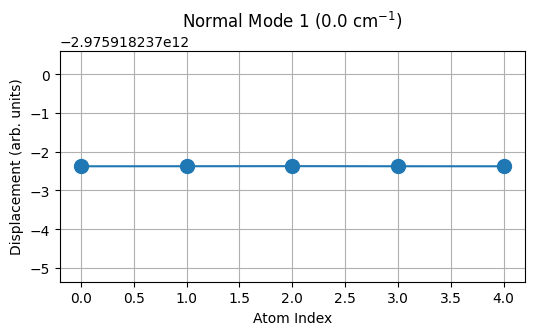

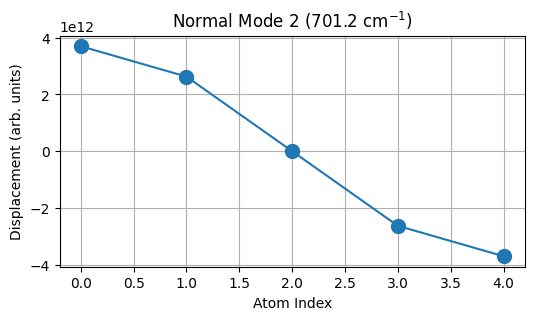

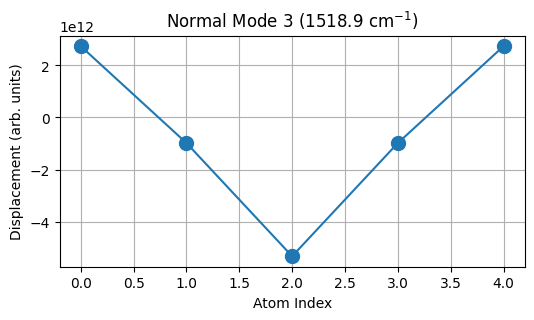

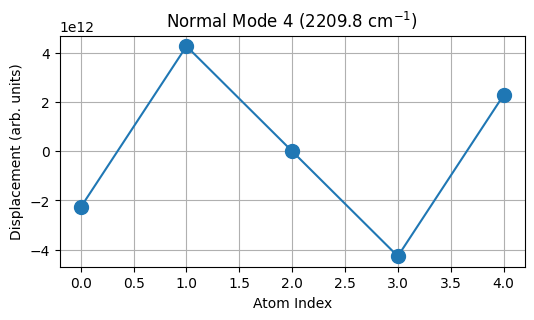

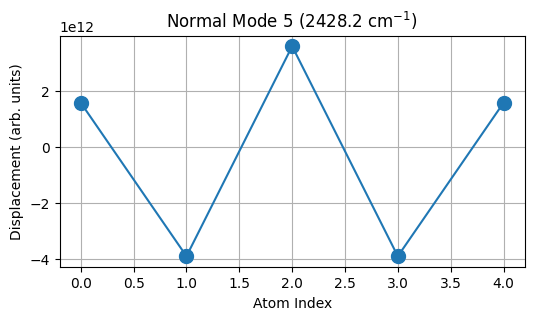

In [3]:
# Normal mode plots
import matplotlib.pyplot as plt

# Atoms along x-axis
atom_positions = np.arange(5)

# Plot each mode
for mode in range(5):
    plt.figure(figsize=(6,3))
    plt.plot(atom_positions, eigenvectors[:,mode], 'o-', markersize=10)
    plt.title(f'Normal Mode {mode+1} ({frequencies_cm1[mode]:.1f} cm$^{{-1}}$)')
    plt.xlabel('Atom Index')
    plt.ylabel('Displacement (arb. units)')
    plt.grid(True)
    plt.show()


In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants
u = 1.66053906660e-27  # atomic mass unit (kg)

# Mass values
M_C = 12 * u   # Carbon mass
M_O = 16 * u   # Oxygen mass

# Force constants
K_val = 1000  # N/m (C≡C bond)
k_val = 1600  # N/m (C=O bond)

# Mass array for C9O3
masses = [M_O] + [M_C]*9 + [M_O] 

# Spring constants for C9O3
springs = [k_val] + [K_val]*8 + [k_val] + [K_val] + [k_val] 


In [6]:
# Mass matrix
M_mat = np.diag(masses)

# Dynamical matrix
N = len(masses)
D_mat = np.zeros((N, N))

for i in range(N-1):
    D_mat[i, i] += springs[i]
    D_mat[i+1, i+1] += springs[i]
    D_mat[i, i+1] -= springs[i]
    D_mat[i+1, i] -= springs[i]
# Solve generalized eigenvalue problem
eigenvalues, eigenvectors = eigh(D_mat, M_mat)

# Frequencies (Hz, THz, cm^-1)
frequencies_Hz = np.sqrt(np.abs(eigenvalues)) / (2 * np.pi)
frequencies_THz = frequencies_Hz * 1e-12
frequencies_cm1 = frequencies_Hz / (2.99792458e10)

# Print the results
for i, freq in enumerate(frequencies_cm1):
    print(f"Mode {i+1}: {freq:.2f} cm^-1")


Mode 1: 0.00 cm^-1
Mode 2: 322.26 cm^-1
Mode 3: 653.17 cm^-1
Mode 4: 989.51 cm^-1
Mode 5: 1318.13 cm^-1
Mode 6: 1623.51 cm^-1
Mode 7: 1891.85 cm^-1
Mode 8: 2112.01 cm^-1
Mode 9: 2275.57 cm^-1
Mode 10: 2383.62 cm^-1
Mode 11: 2401.74 cm^-1


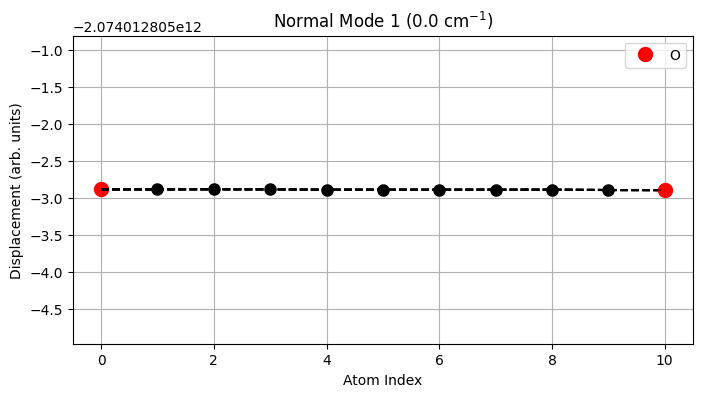

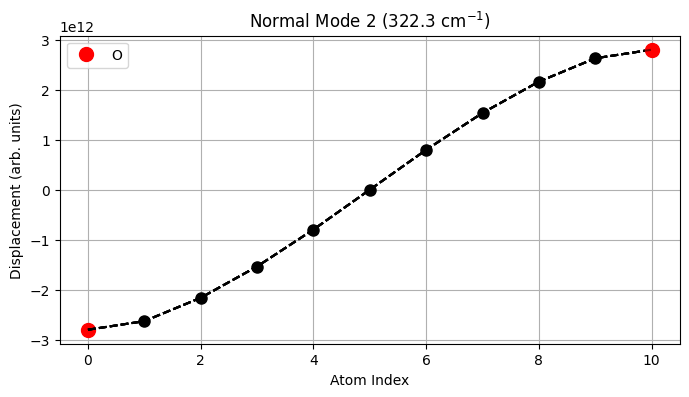

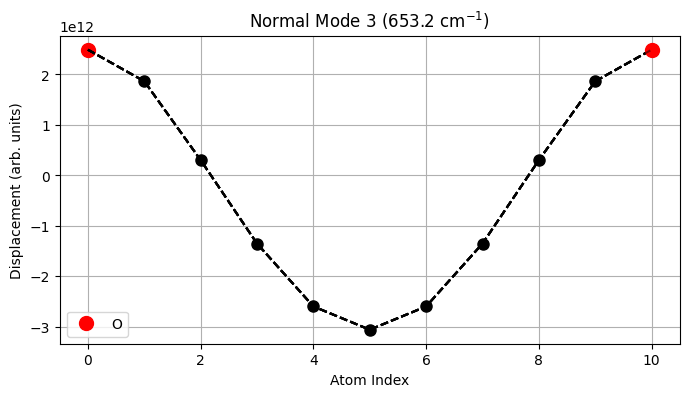

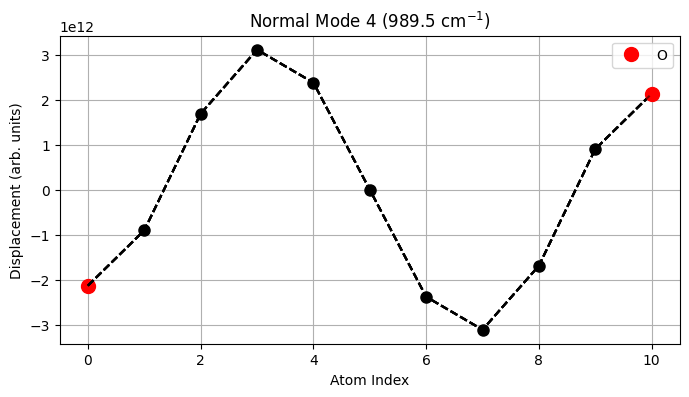

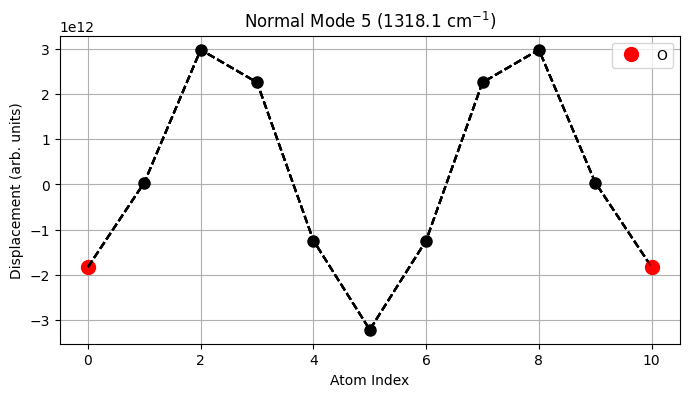

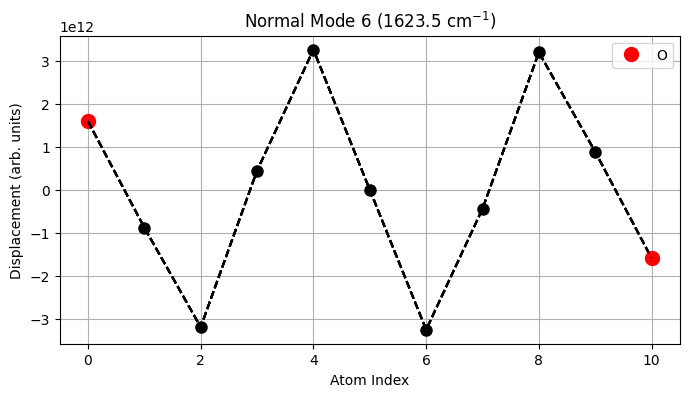

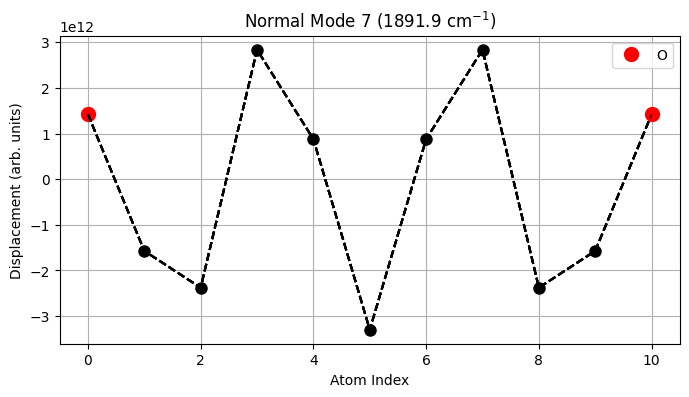

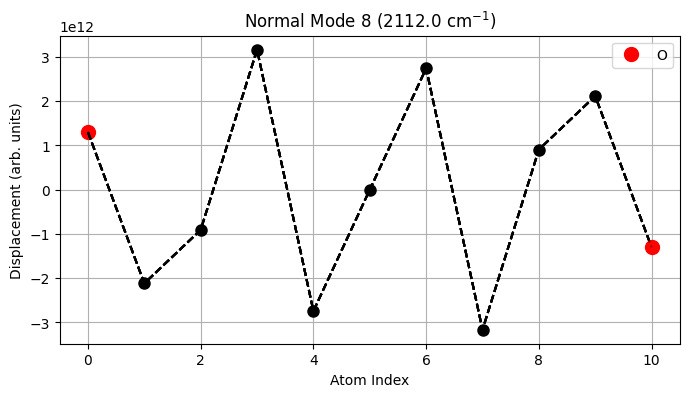

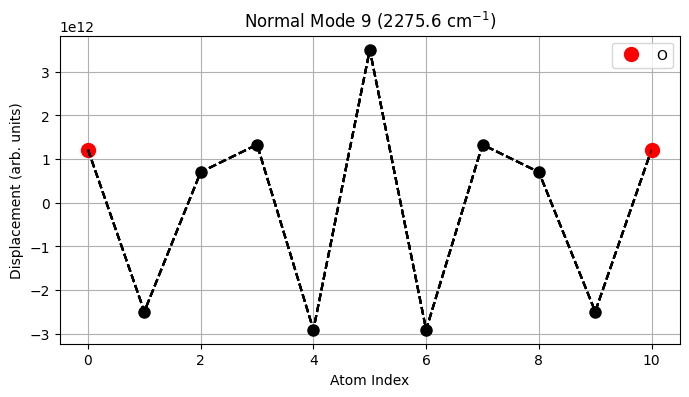

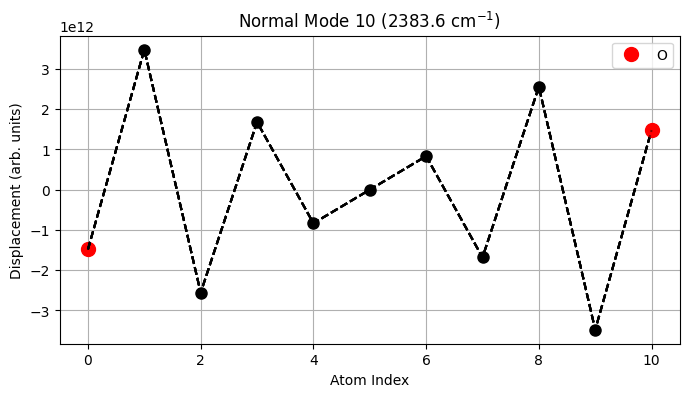

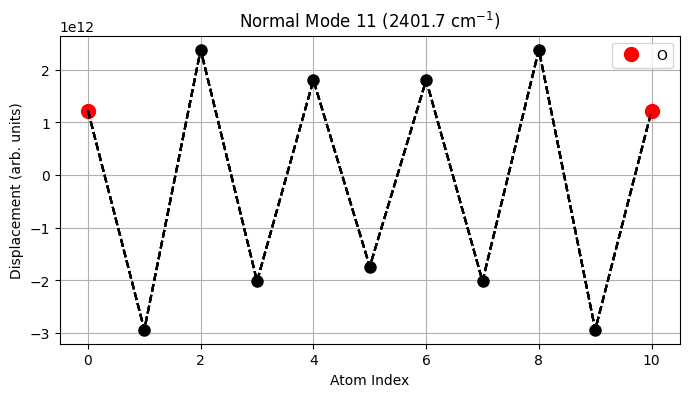

In [7]:
# Define atom types for C9O3
atom_types = ['O'] + ['C']*9 + ['O']

# Plot each normal mode with labeled atoms
atom_positions = np.arange(len(masses))

for mode in range(len(masses)):
    plt.figure(figsize=(8,4))
    
    for idx, atom in enumerate(atom_types):
        if atom == 'O':
            plt.plot(atom_positions[idx], eigenvectors[idx, mode], 'ro', markersize=10, label='O' if idx == 0 else "")
        else:
            plt.plot(atom_positions[idx], eigenvectors[idx, mode], 'ko', markersize=8, label='C' if idx == 0 else "")
        plt.plot(atom_positions, eigenvectors[:, mode], 'k--', alpha=0.5)  # dashed line through points

    
    plt.title(f'Normal Mode {mode+1} ({frequencies_cm1[mode]:.1f} cm$^{{-1}}$)')
    plt.xlabel('Atom Index')
    plt.ylabel('Displacement (arb. units)')
    plt.grid(True)
    plt.legend()
    plt.show()
